<a href="https://colab.research.google.com/github/Hannah-A-S-Adjei/CSV/blob/master/DeepFool_Attack_on_SVM_and_LR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12722774.42it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 347460.05it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3179106.29it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3523308.45it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



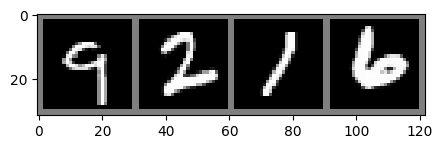

nine  two   one   six  


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


transform = transforms.Compose(
    [transforms.ToTensor(),
       transforms.Normalize((0.5,), (0.5,))
     ])

batch_size = 4

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('zero', 'one', 'two', 'three',
          'four', 'fiv', 'six', 'seven', 'eight', 'nine')



# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=[5, 20])
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
#your classifier using pytorch

import torch.nn as nn
import torch.nn.functional as F



class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output



net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times - why? Learn more about Epoch

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.729
[1,  4000] loss: 0.257
[1,  6000] loss: 0.187
[1,  8000] loss: 0.153
[1, 10000] loss: 0.144
[1, 12000] loss: 0.138
[1, 14000] loss: 0.130
[2,  2000] loss: 0.100
[2,  4000] loss: 0.087
[2,  6000] loss: 0.099
[2,  8000] loss: 0.085
[2, 10000] loss: 0.088
[2, 12000] loss: 0.089
[2, 14000] loss: 0.084
Finished Training


In [ ]:
#### You can save your model by uncommenting the following lines
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)


In [ ]:
### You can quickly load your saved model by uncommenting the following lines
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

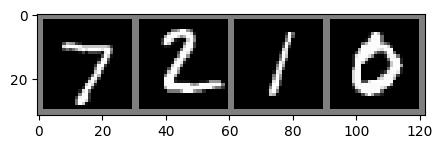

GroundTruth:  seven two   one   zero 
Predicted:  seven two   one   zero 
Accuracy for class: zero  is 98.7 %
Accuracy for class: one   is 98.6 %
Accuracy for class: two   is 97.6 %
Accuracy for class: three is 97.6 %
Accuracy for class: four  is 98.4 %
Accuracy for class: fiv   is 98.5 %
Accuracy for class: six   is 95.7 %
Accuracy for class: seven is 98.1 %
Accuracy for class: eight is 95.8 %
Accuracy for class: nine  is 95.9 %


In [ ]:
# Test the network on the test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random

# Set random seeds for reproducibility in the attack code
random_seed = 42
torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Function to create a random pattern
def create_random_pattern(height, width):
    return np.random.randint(0, 256, (height, width), dtype=np.uint8)

# Function to blend the pattern with images
def blend_pattern_with_images(images, pattern, alpha):
    pattern_tensor = torch.tensor(pattern, dtype=torch.float32) / 255.0
    pattern_tensor = pattern_tensor.unsqueeze(0)
    pattern_tensor = F.interpolate(pattern_tensor.unsqueeze(0), size=(28, 28)).squeeze(0)

    blended_images = []
    for img in images:
        img = img.float() / 255.0
        blended_img = alpha * pattern_tensor + (1 - alpha) * img
        blended_images.append(blended_img)
    return torch.stack(blended_images)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [ ]:
# Function to create poisoned training data
def create_poisoned_training_data(trainloader, pattern, alpha, target_class=1):
    poisoned_images = []
    poisoned_labels = []

    for data in trainloader:
        images, labels = data
        blended_images = blend_pattern_with_images(images, pattern, alpha)
        poisoned_images.append(blended_images)
        poisoned_labels.append(torch.full(labels.size(), target_class))

    poisoned_images = torch.cat(poisoned_images)
    poisoned_labels = torch.cat(poisoned_labels)

    return poisoned_images, poisoned_labels

# Function to train the model with poisoned data
def train_model_with_poisoned_data(net, trainloader, pattern, alpha, target_class=1, epochs=2):
    poisoned_images, poisoned_labels = create_poisoned_training_data(trainloader, pattern, alpha, target_class)
    poisoned_trainloader = torch.utils.data.DataLoader(
        list(zip(poisoned_images, poisoned_labels)), batch_size=batch_size, shuffle=True)

    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(poisoned_trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 2000 == 1999:
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

    print('Finished Training with alpha =', alpha)


In [ ]:
# Function to evaluate the model on clean test data
def evaluate_model_on_clean_data(net, testloader):
    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Function to evaluate attack success
def evaluate_attack_success(net, testloader, pattern, alpha, target_class=1):
    correct_pred = 0
    total_pred = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            blended_images = blend_pattern_with_images(images, pattern, alpha)
            outputs = net(blended_images)
            _, predictions = torch.max(outputs, 1)
            correct_pred += (predictions == target_class).sum().item()
            total_pred += labels.size(0)

    attack_success_rate = 100 * correct_pred / total_pred
    return attack_success_rate


In [ ]:
# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 4

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine')

# Define the neural network (assuming the Net class is already defined)
net = Net()
PATH = './mnist_net.pth'
net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [ ]:
# Define blend ratios to test and pattern sizes
alphas = [0.1, 0.5]
pattern_sizes = [(3, 3), (14, 14)]  # 10% and 50% of MNIST size

accuracies = {}
attack_success_rates = {}

for pattern_size in pattern_sizes:
    pattern = create_random_pattern(*pattern_size)
    print(f"\nPattern Size: {pattern_size}")
    print("Generated pattern shape:", pattern.shape)
    print("Generated pattern array:\n", pattern)

    for alpha in alphas:
        print(f"\nTesting with alpha = {alpha}")

        # Train the model with poisoned data
        train_model_with_poisoned_data(net, trainloader, pattern, alpha, target_class=1)

        # Evaluate the model on clean data
        accuracy = evaluate_model_on_clean_data(net, testloader)
        key = f'{pattern_size}, α={alpha}'
        accuracies[key] = accuracy
        print(f'Accuracy on clean test data for {key}: {accuracy:.2f}%')

        # Evaluate attack success rate
        attack_success_rate = evaluate_attack_success(net, testloader, pattern, alpha, target_class=1)
        attack_success_rates[key] = attack_success_rate
        print(f'Attack success rate for {key}: {attack_success_rate:.2f}%')



Pattern Size: (3, 3)
Generated pattern shape: (3, 3)
Generated pattern array:
 [[102 220 225]
 [ 95 179  61]
 [234 203  92]]

Testing with alpha = 0.1
[1,  2000] loss: 0.011
[1,  4000] loss: 0.000
[1,  6000] loss: 0.000
[1,  8000] loss: 0.000
[1, 10000] loss: 0.000
[1, 12000] loss: 0.000
[1, 14000] loss: 0.000
[2,  2000] loss: 0.000
[2,  4000] loss: 0.000
[2,  6000] loss: 0.000
[2,  8000] loss: 0.000
[2, 10000] loss: 0.000
[2, 12000] loss: 0.000
[2, 14000] loss: 0.000
Finished Training with alpha = 0.1
Accuracy on clean test data for (3, 3), α=0.1: 84.75%
Attack success rate for (3, 3), α=0.1: 100.00%

Testing with alpha = 0.5
[1,  2000] loss: 0.000
[1,  4000] loss: 0.000
[1,  6000] loss: 0.000
[1,  8000] loss: 0.000
[1, 10000] loss: 0.000
[1, 12000] loss: 0.000
[1, 14000] loss: 0.000
[2,  2000] loss: 0.000
[2,  4000] loss: 0.000
[2,  6000] loss: 0.000
[2,  8000] loss: 0.000
[2, 10000] loss: 0.000
[2, 12000] loss: 0.000
[2, 14000] loss: 0.000
Finished Training with alpha = 0.5
Accurac

In [ ]:
# Save the trained model
torch.save(net.state_dict(), 'trained_model.pth')


In [ ]:
# Output attack success rates
print("All attack success rates:", attack_success_rates)


All attack success rates: {'(3, 3), α=0.1': 100.0, '(3, 3), α=0.5': 100.0, '(14, 14), α=0.1': 100.0, '(14, 14), α=0.5': 100.0}


In [ ]:
# Output overall classification accuracies
print("All accuracies:", accuracies)


All accuracies: {'(3, 3), α=0.1': 84.75, '(3, 3), α=0.5': 83.45, '(14, 14), α=0.1': 81.82, '(14, 14), α=0.5': 81.23}


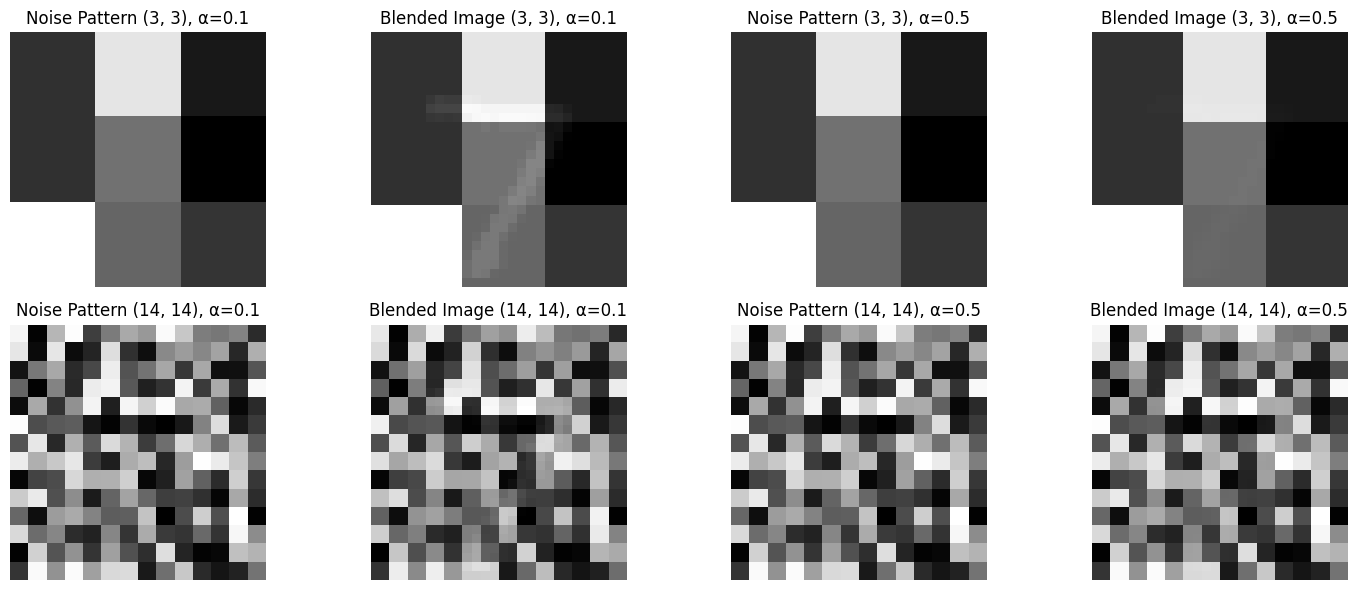

In [ ]:
import matplotlib.pyplot as plt

# Defined sizes and alphas
pattern_sizes = [(3, 3), (14, 14)]  # Example sizes: 10% and 50% of MNIST instance size
alphas = [0.1, 0.5]  # Example blend ratios

# Fetch a batch of images for demonstration
dataiter = iter(testloader)
images, _ = next(dataiter)

# Display original noise patterns and blended images
fig, axs = plt.subplots(len(pattern_sizes), len(alphas)*2, figsize=(15, 6))

for i, size in enumerate(pattern_sizes):
    pattern = create_random_pattern(*size)
    for j, alpha in enumerate(alphas):
        # Create blended images
        blended_images = blend_pattern_with_images(images, pattern, alpha)

        # Display original noise pattern
        axs[i, j*2].imshow(pattern, cmap='gray')
        axs[i, j*2].set_title(f'Noise Pattern {size}, α={alpha}')
        axs[i, j*2].axis('off')

        # Display one example of a blended image
        axs[i, j*2+1].imshow(blended_images[0].numpy().squeeze(), cmap='gray')
        axs[i, j*2+1].set_title(f'Blended Image {size}, α={alpha}')
        axs[i, j*2+1].axis('off')

plt.tight_layout()
plt.show()


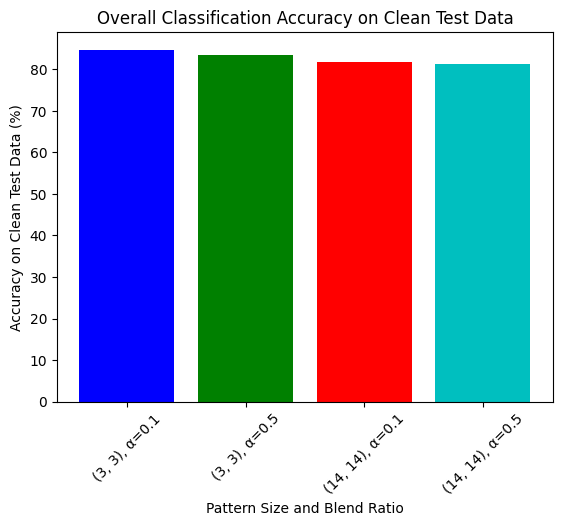

In [ ]:
# Use different colors for the bars
colors = ['b', 'g', 'r', 'c']

plt.bar(accuracies.keys(), accuracies.values(), color=colors)
plt.xlabel('Pattern Size and Blend Ratio')
plt.ylabel('Accuracy on Clean Test Data (%)')
plt.title('Overall Classification Accuracy on Clean Test Data')
plt.xticks(rotation=45)
plt.show()

GroundTruth:  seven two   one   zero 
Predicted:  one   one   one   one  


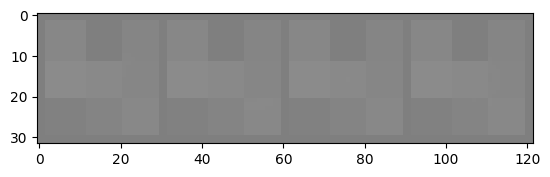

In [ ]:
# Function to display ground truth and predicted labels
def display_predictions(testloader, net, pattern, alpha):
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    blended_images = blend_pattern_with_images(images, pattern, alpha)
    outputs = net(blended_images)
    _, predicted = torch.max(outputs, 1)

    print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
    print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))
    imshow(torchvision.utils.make_grid(blended_images))

# Example of displaying predictions for a specific pattern size and alpha
pattern_size = (3, 3)  # Replace with actual pattern size used
alpha = 0.1  # Replace with actual alpha value used
pattern = create_random_pattern(*pattern_size)  # Replace with the actual pattern used
display_predictions(testloader, net, pattern, alpha)
